                                    Bismillah

# Exploratory data Analysis 
we will use the following data sets
* Cab_data.csv
* City.csv
* Customer_ID.csv
* Transaction_ID.csv
* US Holiday Dates (2004-2021).csv



## importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


### loading and cleaning data

In [2]:
cab=pd.read_csv('Cab_Data.csv')
city=pd.read_csv('City.csv')
cus=pd.read_csv('Customer_ID.csv')
tra=pd.read_csv('Transaction_ID.csv')

In [4]:
cab['Date of Travel'] = pd.to_datetime(cab['Date of Travel'], unit='D', origin='1899-12-30')

In [5]:
cab['Profit']=cab['Price Charged']-cab['Cost of Trip']
cab['year']= cab['Date of Travel'].dt.year
cab['month']= cab['Date of Travel'].dt.month
cab['day']= cab['Date of Travel'].dt.day

In [7]:
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,year,month,day
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,2016,1,8
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,2016,1,6
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,2016,1,2
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,2016,1,7
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844,2016,1,3


In [8]:
cab.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
Profit            0
year              0
month             0
day               0
dtype: int64

### Joining the dataframe

In [9]:
data=cus.merge(tra,on='Customer ID').merge(cab,on='Transaction ID').merge(city,on='City')


In [10]:

data.head()

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,year,month,day,Population,Users
0,29290,Male,28,10813,10000011,Card,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,2016,1,8,"814,885","24,701"
1,29290,Male,28,10813,10351127,Cash,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,2018,7,21,"814,885","24,701"
2,29290,Male,28,10813,10412921,Card,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,2018,11,23,"814,885","24,701"
3,27703,Male,27,9237,10000012,Card,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,2016,1,6,"814,885","24,701"
4,27703,Male,27,9237,10320494,Card,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,2018,4,21,"814,885","24,701"


In [11]:
data.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
Transaction ID        0
Payment_Mode          0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Profit                0
year                  0
month                 0
day                   0
Population            0
Users                 0
dtype: int64

### Detecting Outliers

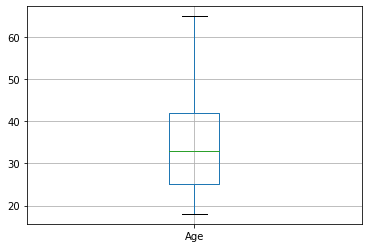

In [86]:
boxplot = data.boxplot(column=[ 'Age'])

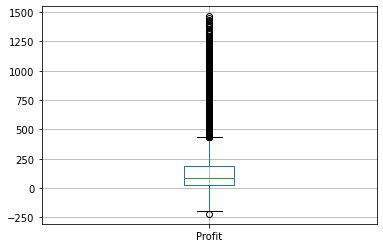

In [87]:
boxplot = data.boxplot(column=[ 'Profit'])

In [12]:
data.shape

(359392, 18)

### renaming some columns for convenience

In [14]:
for col in data.columns:
    if ' ' in col:
        data = data.rename(columns={col:col.replace(' ','_')})

#### deriving features age group and income level

In [31]:
data['Income_level'] = pd.cut(data['Income_(USD/Month)'], bins = [0, 2000,5000, 10000,15000,25000, 35000], include_lowest=True, labels = ['very Low Income', 'Low Income','Average Income', 'Above avg Income','High Income','very High Income'])

In [18]:
data['Age_group'] = pd.cut(data['Age'], bins = [0, 19, 30, 50,100], include_lowest=True, labels = ['Teen ager', 'young', 'middle aged','old'])

#### Hypothesis 1  Is there any effect of months and years on business of both the cab

In [19]:
cypr=data.groupby(["Company","year"])["Profit"].agg(["sum"]) #Formed a new table with year and sum
cypr.reset_index(inplace=True)
cypr.rename(columns={'sum': 'Profit '}, inplace=True)
cypr

,Company,year,Profit
0,Pink Cab,2016,1.713511e+06
1,Pink Cab,2017,2.033655e+06
2,Pink Cab,2018,1.560162e+06
3,Yellow Cab,2016,1.392700e+07
4,Yellow Cab,2017,1.657598e+07
5,Yellow Cab,2018,1.351740e+07


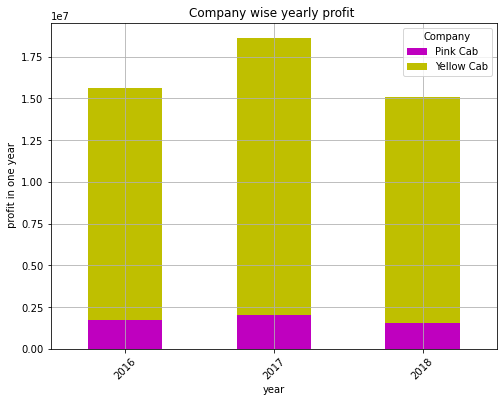

In [97]:
cypr.pivot("year", "Company", "Profit ").plot(kind='bar', stacked=True,figsize=(8,6), color='my')#m for magenta y for yellow
plt.title(label='Company wise yearly profit ')
plt.ylabel(' profit in one year')
plt.grid()
plt.xticks(rotation=45)
plt.show()

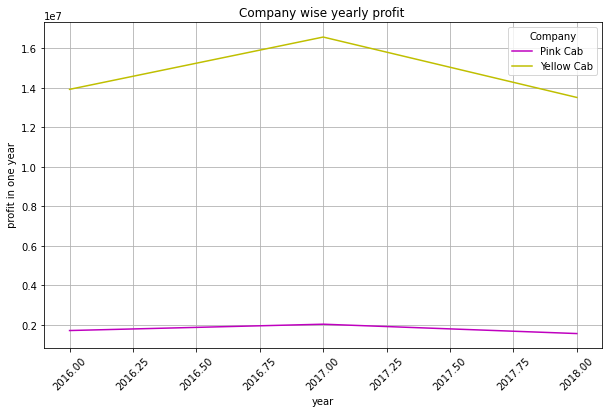

In [99]:
cypr.pivot("year", "Company", "Profit ").plot(kind='line',figsize=(10,6), color='my')#m for magenta y for yellow
plt.title(label='Company wise yearly profit ')
plt.ylabel(' profit in one year')
plt.grid()
plt.xticks(rotation=45)
plt.show()

In [21]:
cmtr=data.groupby(["Company","month"])["Transaction_ID"].agg(["count"]) #Formed a new table with year and sum
cmtr.reset_index(inplace=True)
cmtr.rename(columns={'count': 'No._Of_Transaction'}, inplace=True)
cmtr

,Company,month,No._Of_Transaction
0,Pink Cab,1,5057
1,Pink Cab,2,3375
2,Pink Cab,3,4223
3,Pink Cab,4,4083
4,Pink Cab,5,4960
5,Pink Cab,6,5877
6,Pink Cab,7,6590
7,Pink Cab,8,7739
8,Pink Cab,9,9658
9,Pink Cab,10,10576


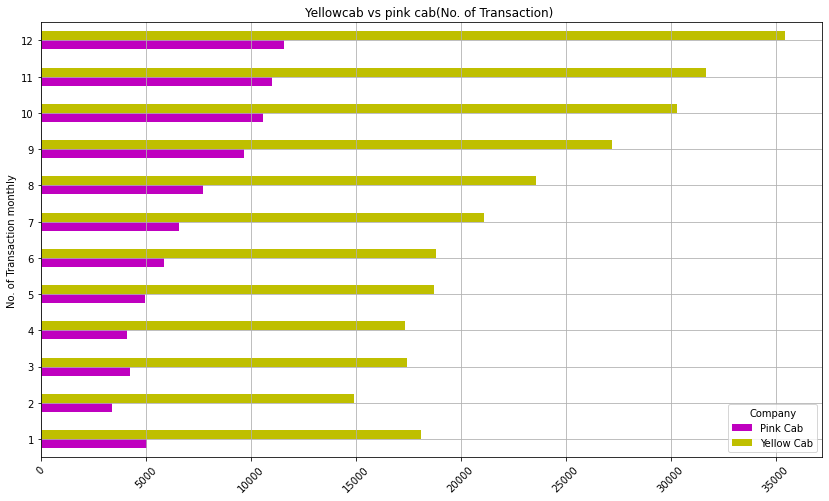

In [22]:
cmtr.pivot("month", "Company", "No._Of_Transaction").plot(kind='barh', figsize=(14,8), color='my')
plt.title(label='Yellowcab vs pink cab(No. of Transaction) ')
plt.ylabel('No. of Transaction monthly')
plt.grid()
plt.xticks(rotation=45)
plt.show()

### Conclusion 1
* business has increases in the year 2017 and declined in 2018 majorly for yellow cab
* we can see a significant increase in travelling from july to december
* the trend is similar in both the cab but yellow cab has major impact

## Hypothesis2 - Is there any major  impact of cities on the business
 Analysing city data

In [23]:
cctr=data.groupby(["City","Company"])["Profit"].agg(["mean"]) #Formed a new table with year and sum
cctr.reset_index(inplace=True)
cctr.rename(columns={'mean': 'Profit'}, inplace=True)
cctr

,City,Company,Profit
0,ATLANTA GA,Pink Cab,54.511961
1,ATLANTA GA,Yellow Cab,128.797723
2,AUSTIN TX,Pink Cab,78.932168
3,AUSTIN TX,Yellow Cab,125.249582
4,BOSTON MA,Pink Cab,50.520960
5,BOSTON MA,Yellow Cab,61.483619
6,CHICAGO IL,Pink Cab,34.047910
7,CHICAGO IL,Yellow Cab,64.924486
8,DALLAS TX,Pink Cab,17.920371
9,DALLAS TX,Yellow Cab,195.849415


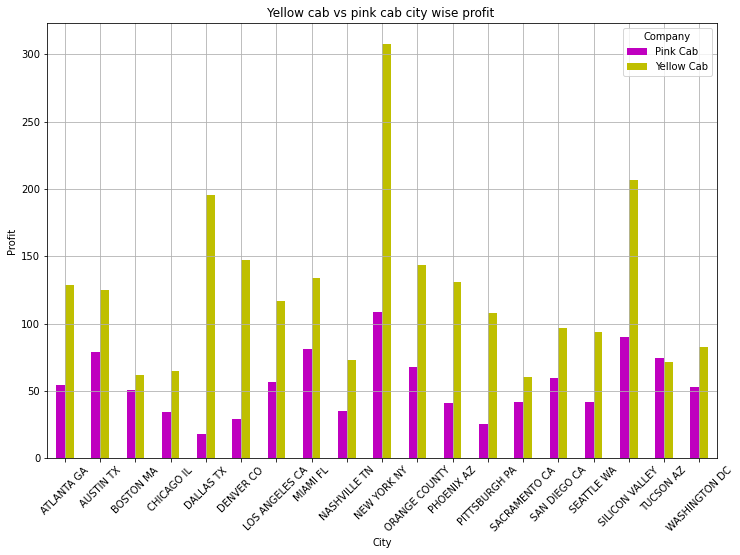

In [24]:
cctr.pivot("City", "Company", "Profit").plot(kind='bar', figsize=(12,8), color='my')
plt.title(label='Yellow cab vs pink cab city wise profit ')
plt.ylabel('Profit')
plt.grid()
plt.xticks(rotation=45)
plt.show()

In [25]:
city = data.groupby('City').Transaction_ID.count()
city

City
ATLANTA GA         7557
AUSTIN TX          4896
BOSTON MA         29692
CHICAGO IL        56625
DALLAS TX          7017
DENVER CO          3825
LOS ANGELES CA    48033
MIAMI FL           6454
NASHVILLE TN       3010
NEW YORK NY       99885
ORANGE COUNTY      3982
PHOENIX AZ         2064
PITTSBURGH PA      1313
SACRAMENTO CA      2367
SAN DIEGO CA      20488
SEATTLE WA         7997
SILICON VALLEY     8519
TUCSON AZ          1931
WASHINGTON DC     43737
Name: Transaction_ID, dtype: int64

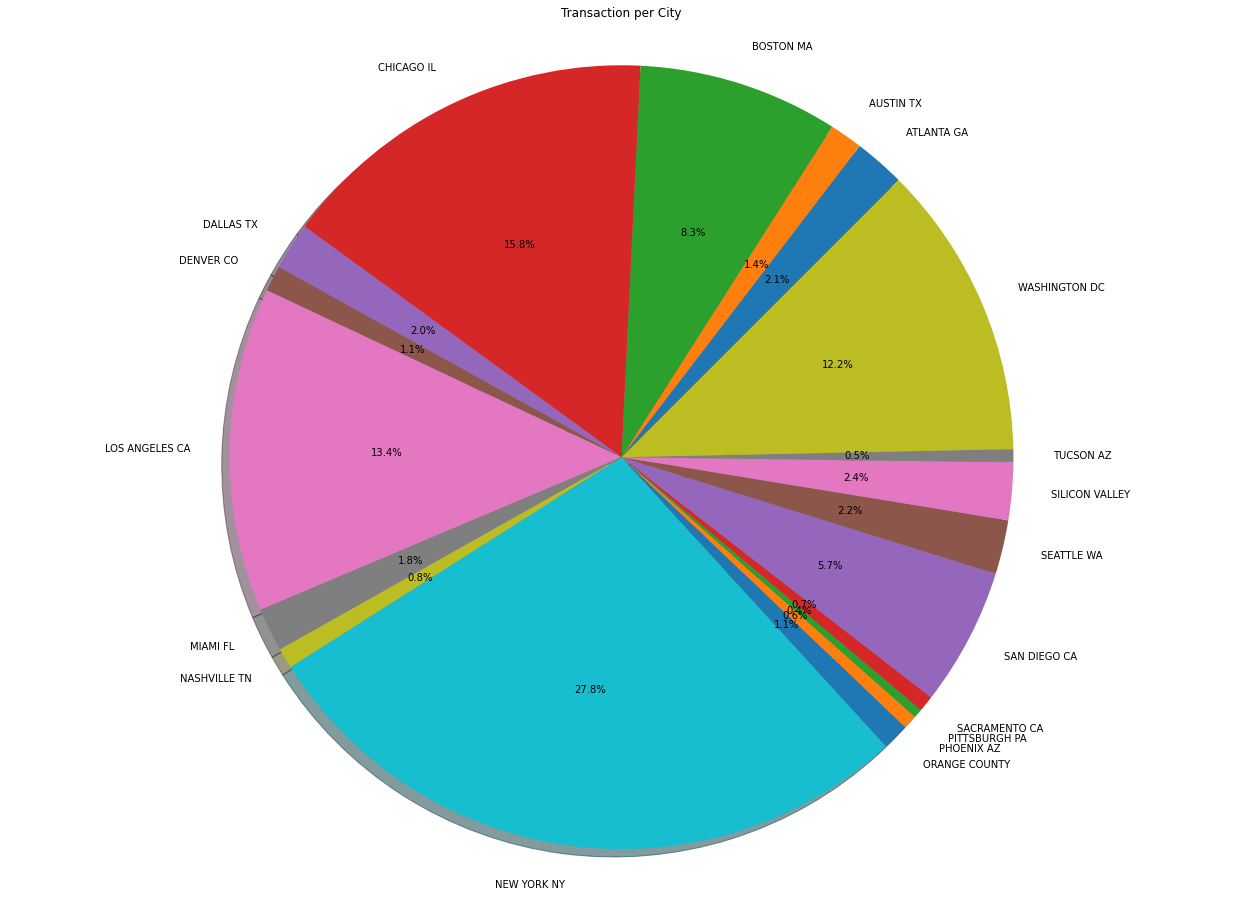

In [26]:
labs = city.index
vals = city.values
figp, axp = plt.subplots(figsize=(22,16))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=45,)
axp.axis('equal')

plt.title('Transaction per City')
plt.show()

### Conclusion 2 
* NewYork followed by silicon valley produce a major share of profit for both the cab
* But Dallas people mostly prefer yellow cab and has a least no. of pink cab customer 

### Hypothesis 3 - Can Age be an Important factor in the business

Analysing by Age Group

In [29]:
acpr=data.groupby(["Age_group","Company"])["Profit"].agg(["sum"]) #Formed a new table with year and sum
acpr.reset_index(inplace=True)
acpr.rename(columns={'sum': 'Profit'}, inplace=True)
acpr

,Age_group,Company,Profit
0,Teen ager,Pink Cab,3.486523e+05
1,Teen ager,Yellow Cab,2.629782e+06
2,young,Pink Cab,1.897829e+06
3,young,Yellow Cab,1.566365e+07
4,middle aged,Pink Cab,2.224186e+06
5,middle aged,Yellow Cab,1.899381e+07
6,old,Pink Cab,8.366612e+05
7,old,Yellow Cab,6.733130e+06


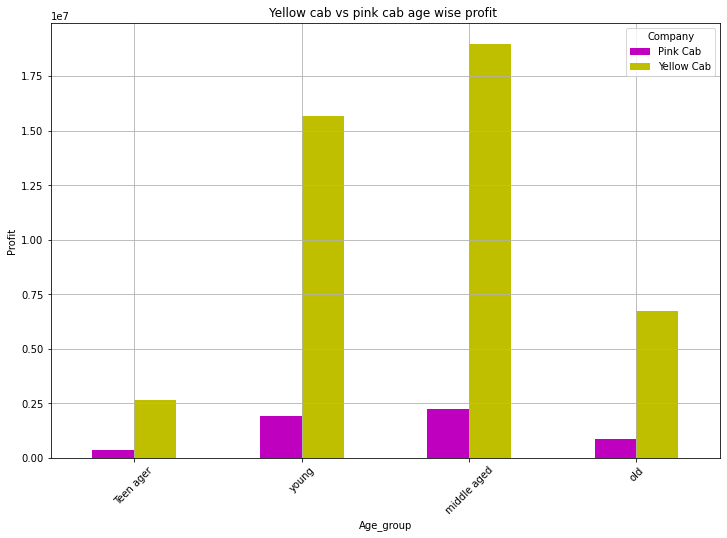

In [30]:
acpr.pivot("Age_group", "Company", "Profit").plot(kind='bar', figsize=(12,8), color='my')
plt.title(label='Yellow cab vs pink cab age wise profit ')
plt.ylabel('Profit')
plt.grid()
plt.xticks(rotation=45)
plt.show()

#### Conclusion3 
* It is clearly visible that middle aged followed by young are the most profitable customer
* old customer is half of the young customer and very few customers are teenagers
* This trend is similar for both the cab but profit of pink cab is much much leasser than the yellow cab

### Hypothesis 4 Can level of income imapct the cab business
Income group wise Analysis

In [36]:
# income vs Transaction
Ictr=data.groupby(["Income_level","Company"])["Transaction_ID"].agg(["count"]) #Formed a new table with year and sum
Ictr.reset_index(inplace=True)
Ictr.rename(columns={'count': 'No. of Transaction'}, inplace=True)
Ictr

,Income_level,Company,No. of Transaction
0,very Low Income,Pink Cab,2
1,very Low Income,Yellow Cab,7
2,Low Income,Pink Cab,10115
3,Low Income,Yellow Cab,32326
4,Average Income,Pink Cab,16585
5,Average Income,Yellow Cab,53675
6,Above avg Income,Pink Cab,16553
7,Above avg Income,Yellow Cab,54609
8,High Income,Pink Cab,33659
9,High Income,Yellow Cab,108965


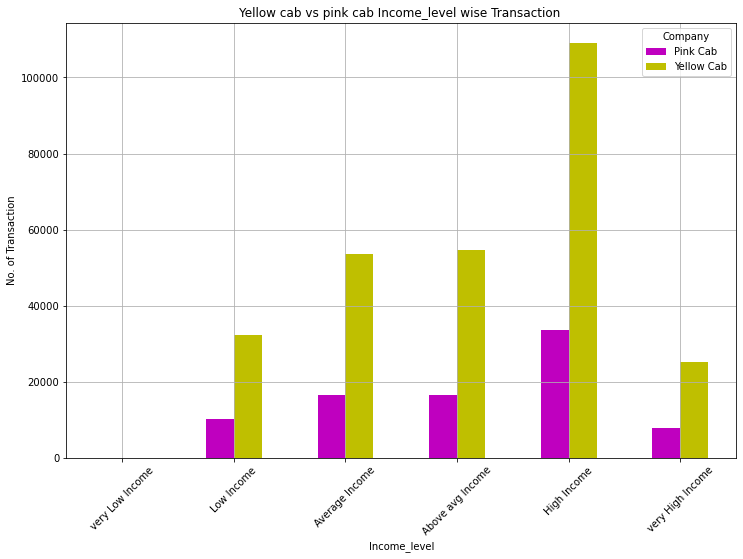

In [38]:
Ictr.pivot("Income_level", "Company", "No. of Transaction").plot(kind='bar', figsize=(12,8), color='my')
plt.title(label='Yellow cab vs pink cab Income_level wise Transaction ')
plt.ylabel('No. of Transaction')
plt.grid()
plt.xticks(rotation=45)
plt.show()

Income VS Profit

In [34]:
Icpr=data.groupby(["Income_level","Company"])["Profit"].agg(["sum"]) #Formed a new table with year and sum
Icpr.reset_index(inplace=True)
Icpr.rename(columns={'sum': 'Profit'}, inplace=True)
Icpr

,Income_level,Company,Profit
0,very Low Income,Pink Cab,1.039120e+02
1,very Low Income,Yellow Cab,1.025583e+03
2,Low Income,Pink Cab,6.344141e+05
3,Low Income,Yellow Cab,5.079718e+06
4,Average Income,Pink Cab,1.029348e+06
5,Average Income,Yellow Cab,8.444553e+06
6,Above avg Income,Pink Cab,1.023100e+06
7,Above avg Income,Yellow Cab,8.734090e+06
8,High Income,Pink Cab,2.133975e+06
9,High Income,Yellow Cab,1.776488e+07


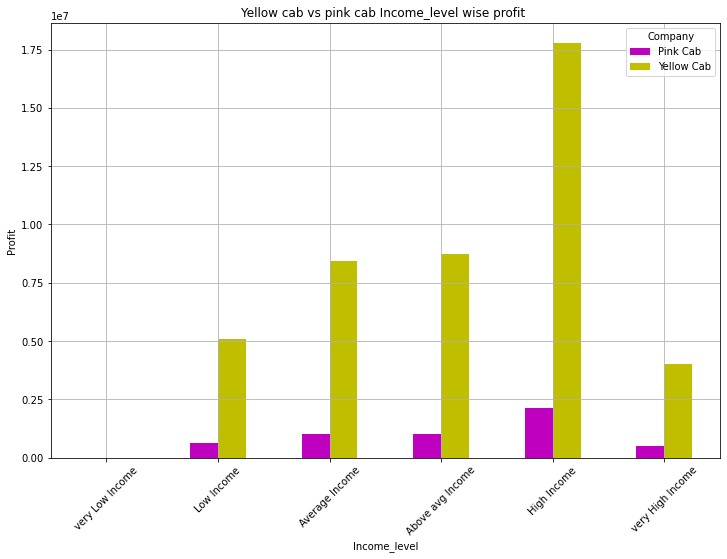

In [35]:
Icpr.pivot("Income_level", "Company", "Profit").plot(kind='bar', figsize=(12,8), color='my')
plt.title(label='Yellow cab vs pink cab Income_level wise profit ')
plt.ylabel('Profit')
plt.grid()
plt.xticks(rotation=45)
plt.show()

### Conclusion 4 
* very low income group is negligible no.of customer for bith the cab
* High Income group are the major customer for cab industry (particularly yellow cab)
* Avg and above avg income also generate a significant amount of business.
* low income are not so frequent traveller yet more than very high income group
* Very High income group prefer to use their own car that's why they  use cab less often
* The trend is similar for both the cab company but yellow cab share is much much higher than the pink cab.

### Hypothesis 5 Can Gender plays an important role in cab business 

In [41]:
gender = data.groupby('Gender').Transaction_ID.count()
gender

Gender
Female    153480
Male      205912
Name: Transaction_ID, dtype: int64

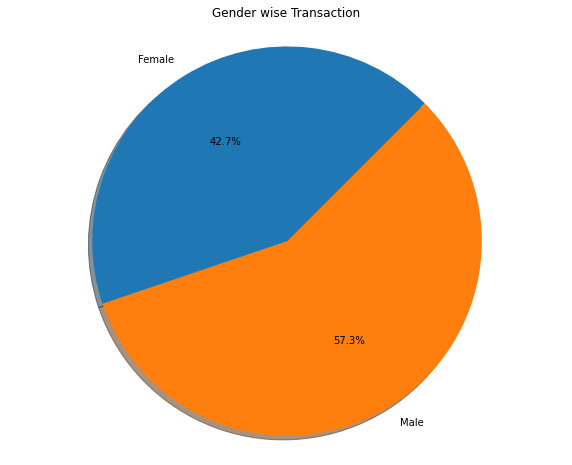

In [43]:
labs = gender.index
vals = gender.values
figp, axp = plt.subplots(figsize=(10,8))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=45,)
axp.axis('equal')

plt.title('Gender wise Transaction')
plt.show()

In [44]:
gcpc=data.groupby(["Gender","Company"])["Price_Charged"].agg(["sum"]) 
gcpc.reset_index(inplace=True)
gcpc.rename(columns={'sum': 'Price_Charged'}, inplace=True)
gcpc

,Gender,Company,Price_Charged
0,Female,Pink Cab,1.164222e+07
1,Female,Yellow Cab,5.273030e+07
2,Male,Pink Cab,1.468603e+07
3,Male,Yellow Cab,7.312359e+07


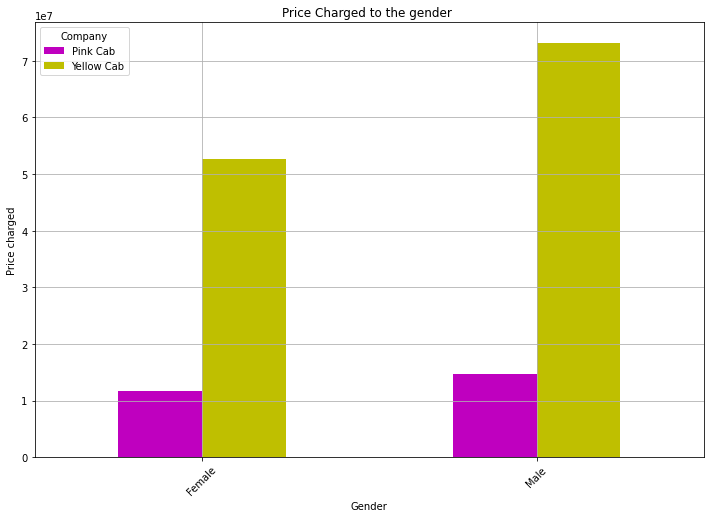

In [45]:
gcpc.pivot("Gender", "Company", "Price_Charged").plot(kind='bar', figsize=(12,8), color='my')
plt.title(label='Price Charged to the gender ')
plt.ylabel('Price charged')
plt.grid()
plt.xticks(rotation=45)
plt.show()

In [49]:
gcct=data.groupby(["Gender","Company"])["Cost_of_Trip"].agg(["sum"]) 
gcct.reset_index(inplace=True)
gcct.rename(columns={'sum': 'Cost_of_Trip'}, inplace=True)
gcct

,Gender,Company,Cost_of_Trip
0,Female,Pink Cab,9.311686e+06
1,Female,Yellow Cab,3.459888e+07
2,Male,Pink Cab,1.170924e+07
3,Male,Yellow Cab,4.723463e+07


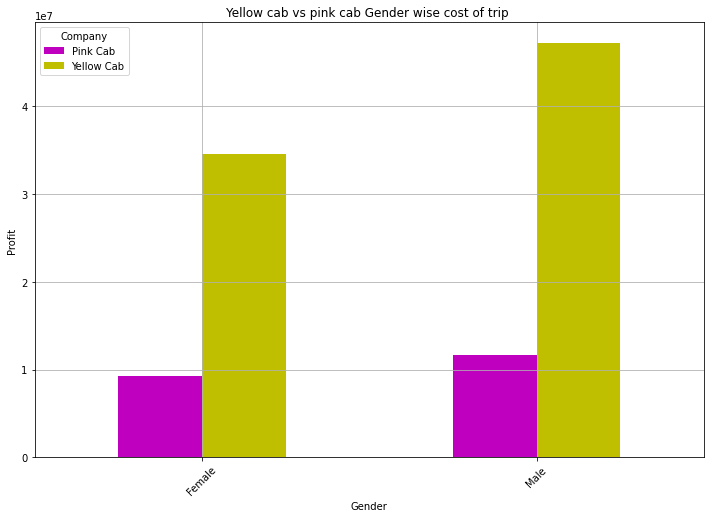

In [50]:
gcct.pivot("Gender", "Company", "Cost_of_Trip").plot(kind='bar', figsize=(12,8), color='my')
plt.title(label='Yellow cab vs pink cab Gender wise cost of trip ')
plt.ylabel('Profit')
plt.grid()
plt.xticks(rotation=45)
plt.show()

In [39]:
scpr=data.groupby(["Gender","Company"])["Profit"].agg(["sum"]) #Formed a new table with year and sum
scpr.reset_index(inplace=True)
scpr.rename(columns={'sum': 'TotalProfit'}, inplace=True)
scpr

,Gender,Company,TotalProfit
0,Female,Pink Cab,2.330533e+06
1,Female,Yellow Cab,1.813142e+07
2,Male,Pink Cab,2.976796e+06
3,Male,Yellow Cab,2.588896e+07


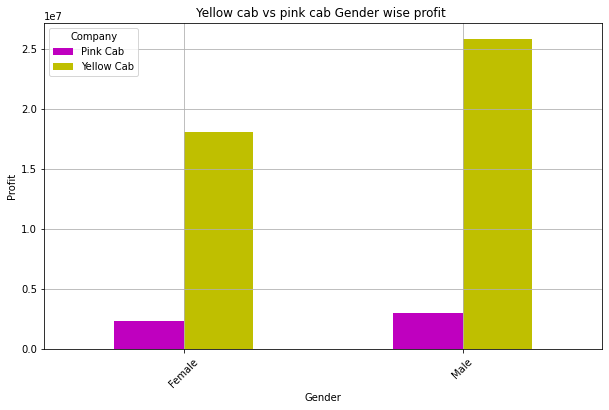

In [53]:
scpr.pivot("Gender", "Company", "TotalProfit").plot(kind='bar', figsize=(10,6), color='my')
plt.title(label='Yellow cab vs pink cab Gender wise profit ')
plt.ylabel('Profit')
plt.grid()
plt.xticks(rotation=45)
plt.show()

### Conclusion 5
* We can see that female customer are less than male 
* Yellow cab has significantly large no. of male customer than female
* But Pink cab has negligible difference in female and male customer's profit share

### Hypothesis 6- can payment method be a factor in cab business

In [56]:
pm = data.groupby('Payment_Mode').Transaction_ID.count()
pm

Payment_Mode
Card    215504
Cash    143888
Name: Transaction_ID, dtype: int64

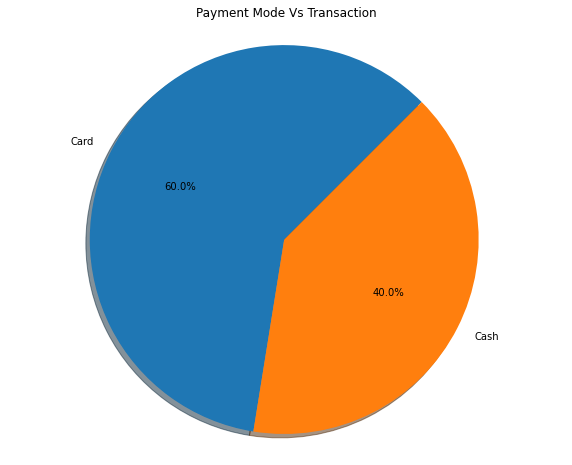

In [57]:
labs = pm.index
vals = pm.values
figp, axp = plt.subplots(figsize=(10,8))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=45,)
axp.axis('equal')

plt.title('Payment Mode Vs Transaction')
plt.show()

60 % of the customer in cab industry prefer to pay by card

Further Analysing company wise

In [58]:
pmcp=data.groupby(["Payment_Mode","Company"])["Profit"].agg(["sum"]) #Formed a new table with year and sum
pmcp.reset_index(inplace=True)
pmcp.rename(columns={'sum': 'TotalProfit'}, inplace=True)
pmcp

,Payment_Mode,Company,TotalProfit
0,Card,Pink Cab,3.180603e+06
1,Card,Yellow Cab,2.636208e+07
2,Cash,Pink Cab,2.126726e+06
3,Cash,Yellow Cab,1.765830e+07


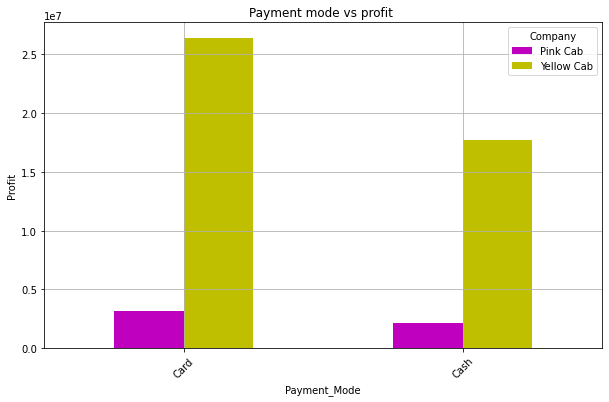

In [61]:
pmcp.pivot("Payment_Mode", "Company", "TotalProfit").plot(kind='bar', figsize=(10,6), color='my')
plt.title(label='Payment mode vs profit ')
plt.ylabel('Profit')
plt.grid()
plt.xticks(rotation=45)
plt.show()

### Conclusion 6 
* 60 % customer pay by card and 40 % pay by cash
* The trend similar for both the cab except the transaction and profit is very less than yellow cab

### Hypothesis 7 - Can holidays affects the cab  business
For that we will load us holiday data

In [62]:
us=pd.read_csv('US Holiday Dates (2004-2021).csv')

This data set has data from the year 2004-21 but we need only three years of data 
let's extract us holiday data for 2016-2018

In [63]:
us3=us[us.Year.isin([2016,2017,2018])]

In [64]:
data = data.rename(columns={'Date_of_Travel':'Date'})

In [66]:
from functools import partial
to_datetime_fmt = partial(pd.to_datetime, format='%Y-%m-%d')

In [ ]:
us3['Date'] = us3['Date'].apply(to_datetime_fmt)

Joining the data with holiday data on the basis of date

In [69]:
H = data.merge(us3,on='Date', how='inner')

In [70]:
H.head()

,Customer_ID,Gender,Age,Income_(USD/Month),Transaction_ID,Payment_Mode,Date,Company,City,KM_Travelled,...,day,Population,Users,Income_level,Age_group,Holiday,WeekDay,Month,Day,Year
0,27318,Male,25,13984,10072285,Card,2016-09-04,Pink Cab,ATLANTA GA,45.20,...,4,"814,885","24,701",Above avg Income,young,Labor Day Weekend,Sunday,9,4,2016
1,29558,Male,27,9555,10073170,Card,2016-09-04,Yellow Cab,ATLANTA GA,29.38,...,4,"814,885","24,701",Average Income,young,Labor Day Weekend,Sunday,9,4,2016
2,29763,Male,47,15309,10073189,Card,2016-09-04,Yellow Cab,ATLANTA GA,10.53,...,4,"814,885","24,701",High Income,middle aged,Labor Day Weekend,Sunday,9,4,2016
3,29990,Male,61,18475,10069464,Card,2016-09-04,Pink Cab,ATLANTA GA,36.36,...,4,"814,885","24,701",High Income,old,Labor Day Weekend,Sunday,9,4,2016
4,27925,Female,24,23541,10072292,Card,2016-09-04,Pink Cab,ATLANTA GA,37.83,...,4,"814,885","24,701",High Income,young,Labor Day Weekend,Sunday,9,4,2016


Analysing the impact of holidays on cab business

In [ ]:
# dropping the redundant column

In [93]:
H.drop(['day','month','year','Income_(USD/Month)','Age'], axis = 1) 

,Customer_ID,Gender,Transaction_ID,Payment_Mode,Date,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Profit,Population,Users,Income_level,Age_group,Holiday,WeekDay,Month,Day,Year
0,27318,Male,10072285,Card,2016-09-04,Pink Cab,ATLANTA GA,45.20,539.01,479.1200,59.8900,"814,885","24,701",Above avg Income,young,Labor Day Weekend,Sunday,9,4,2016
1,29558,Male,10073170,Card,2016-09-04,Yellow Cab,ATLANTA GA,29.38,585.56,401.9184,183.6416,"814,885","24,701",Average Income,young,Labor Day Weekend,Sunday,9,4,2016
2,29763,Male,10073189,Card,2016-09-04,Yellow Cab,ATLANTA GA,10.53,185.18,144.0504,41.1296,"814,885","24,701",High Income,middle aged,Labor Day Weekend,Sunday,9,4,2016
3,29990,Male,10069464,Card,2016-09-04,Pink Cab,ATLANTA GA,36.36,388.58,429.0480,-40.4680,"814,885","24,701",High Income,old,Labor Day Weekend,Sunday,9,4,2016
4,27925,Female,10072292,Card,2016-09-04,Pink Cab,ATLANTA GA,37.83,458.97,438.8280,20.1420,"814,885","24,701",High Income,young,Labor Day Weekend,Sunday,9,4,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19101,51701,Male,10186100,Card,2017-06-19,Yellow Cab,WASHINGTON DC,6.30,94.30,85.4280,8.8720,"418,859","127,001",very High Income,young,Juneteenth,Monday,6,19,2017
19102,51709,Female,10188491,Card,2017-06-19,Yellow Cab,WASHINGTON DC,10.30,197.52,138.4320,59.0880,"418,859","127,001",Above avg Income,middle aged,Juneteenth,Monday,6,19,2017
19103,53761,Female,10186276,Cash,2017-06-19,Yellow Cab,WASHINGTON DC,25.65,449.29,366.2820,83.0080,"418,859","127,001",Above avg Income,middle aged,Juneteenth,Monday,6,19,2017
19104,53814,Female,10186284,Card,2017-06-19,Yellow Cab,WASHINGTON DC,12.24,206.60,160.0992,46.5008,"418,859","127,001",Average Income,young,Juneteenth,Monday,6,19,2017


In [71]:
hctr=H.groupby(["Holiday","Company"])["Transaction_ID"].agg(["count"]) #Formed a new table with year and sum
hctr.reset_index(inplace=True)
hctr.rename(columns={'count': 'No.of transaction'}, inplace=True)
hctr

,Holiday,Company,No.of transaction
0,4th of July,Pink Cab,108
1,4th of July,Yellow Cab,339
2,Christmas Day,Pink Cab,337
3,Christmas Day,Yellow Cab,994
4,Christmas Eve,Pink Cab,480
5,Christmas Eve,Yellow Cab,1531
6,Columbus Day,Pink Cab,188
7,Columbus Day,Yellow Cab,485
8,Eastern Easter,Pink Cab,187
9,Eastern Easter,Yellow Cab,853


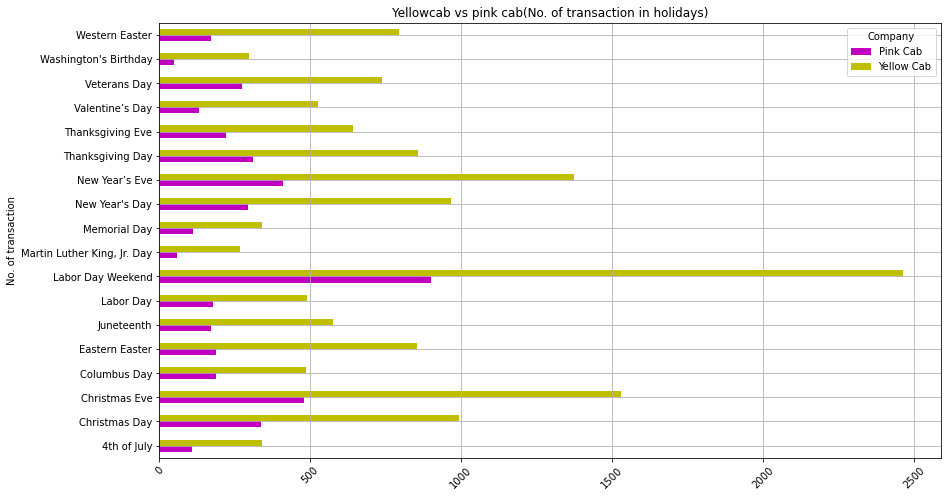

In [72]:
hctr.pivot("Holiday", "Company", "No.of transaction").plot(kind='barh', figsize=(14,8), color='my')
plt.title(label='Yellowcab vs pink cab(No. of transaction in holidays)')
plt.ylabel('No. of transaction')
plt.grid()
plt.xticks(rotation=45)
plt.show()

In [73]:
hckt=H.groupby(["Holiday","Company"])["KM_Travelled"].agg(["sum"]) #Formed a new table with year and sum
hckt.reset_index(inplace=True)
hckt.rename(columns={'sum': 'KM_Travelled'}, inplace=True)
hckt

,Holiday,Company,KM_Travelled
0,4th of July,Pink Cab,2544.34
1,4th of July,Yellow Cab,7871.78
2,Christmas Day,Pink Cab,7876.71
3,Christmas Day,Yellow Cab,22387.99
4,Christmas Eve,Pink Cab,10909.09
5,Christmas Eve,Yellow Cab,34534.68
6,Columbus Day,Pink Cab,4431.60
7,Columbus Day,Yellow Cab,10520.90
8,Eastern Easter,Pink Cab,4115.34
9,Eastern Easter,Yellow Cab,19540.22


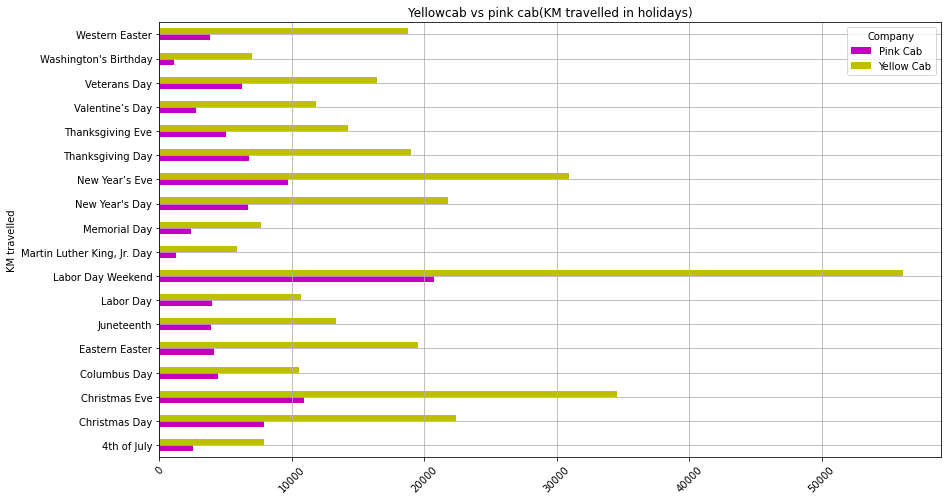

In [74]:
hckt.pivot("Holiday", "Company", "KM_Travelled").plot(kind='barh', figsize=(14,8), color='my')
plt.title(label='Yellowcab vs pink cab(KM travelled in holidays)')
plt.ylabel('KM travelled')
plt.grid()
plt.xticks(rotation=45)
plt.show()

In [75]:
hctr=H.groupby(["Holiday","Company"])["Profit"].agg(["sum"]) 
hctr.reset_index(inplace=True)
hctr.rename(columns={'sum': 'Profit'}, inplace=True)
hctr

,Holiday,Company,Profit
0,4th of July,Pink Cab,3531.2310
1,4th of July,Yellow Cab,42092.3848
2,Christmas Day,Pink Cab,34583.6290
3,Christmas Day,Yellow Cab,154119.5560
4,Christmas Eve,Pink Cab,54255.2240
5,Christmas Eve,Yellow Cab,272099.1292
6,Columbus Day,Pink Cab,9749.6620
7,Columbus Day,Yellow Cab,57962.0328
8,Eastern Easter,Pink Cab,11027.6650
9,Eastern Easter,Yellow Cab,193955.7368


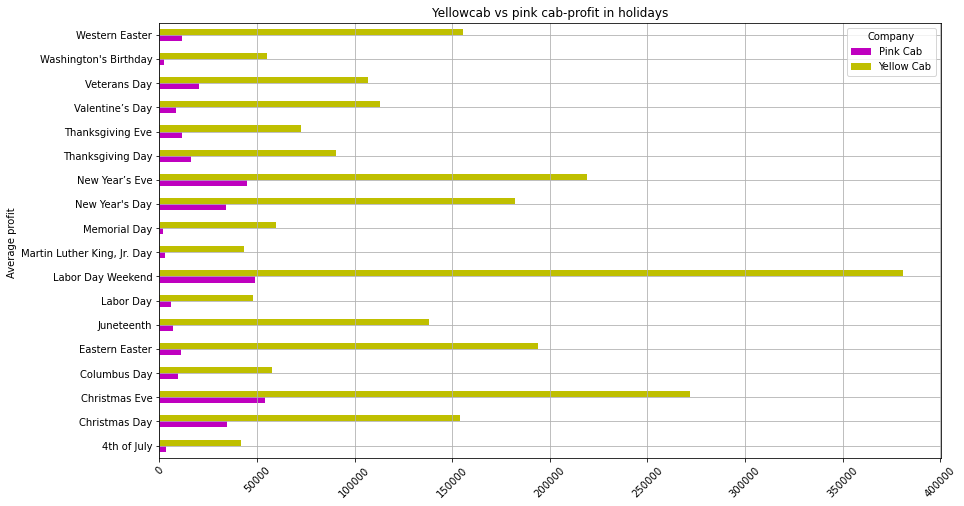

In [76]:
hctr.pivot("Holiday", "Company", "Profit").plot(kind='barh', figsize=(14,8), color='my')
plt.title(label='Yellowcab vs pink cab-profit in holidays')
plt.ylabel('Average profit ')
plt.grid()
plt.xticks(rotation=45)
plt.show()

In [77]:
hipr=H.groupby(["Holiday","Income_level"])["Profit"].agg(["sum"]) 
hipr.reset_index(inplace=True)
hipr.rename(columns={'sum': 'Profit'}, inplace=True)
hipr

,Holiday,Income_level,Profit
0,4th of July,very Low Income,NaN
1,4th of July,Low Income,5398.2294
2,4th of July,Average Income,6837.6540
3,4th of July,Above avg Income,11582.7848
4,4th of July,High Income,17835.3576
...,...,...,...
103,Western Easter,Low Income,21971.5032
104,Western Easter,Average Income,38721.2288
105,Western Easter,Above avg Income,35503.2912
106,Western Easter,High Income,58353.4074


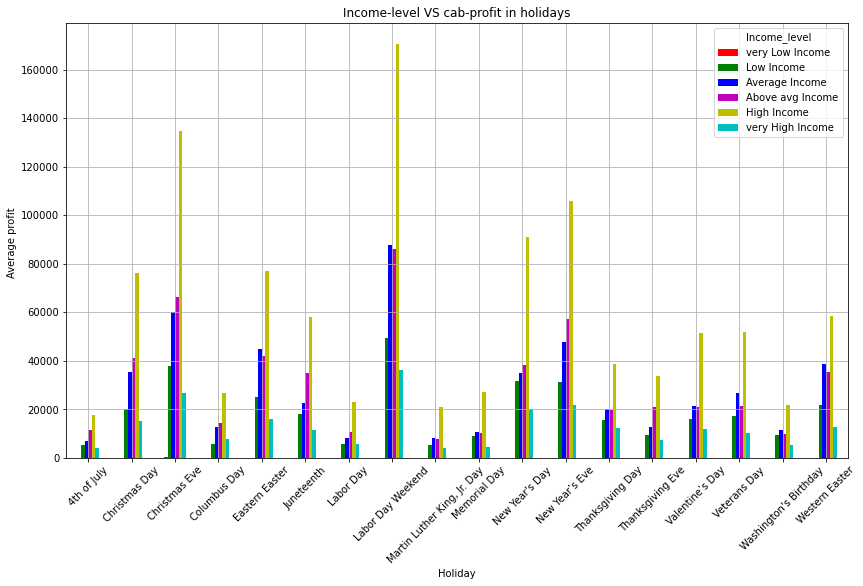

In [85]:
hipr.pivot("Holiday", "Income_level", "Profit").plot(kind='bar', figsize=(14,8), color='rgbmyc')
plt.title(label='Income-level VS cab-profit in holidays')
plt.ylabel('Average profit ')
plt.grid()
plt.xticks(rotation=45)
plt.show()

In [89]:
wctr=H.groupby(["WeekDay","Company"])["Profit"].agg(["sum"]) 
wctr.reset_index(inplace=True)
wctr.rename(columns={'sum': 'Profit'}, inplace=True)
wctr

,WeekDay,Company,Profit
0,Friday,Pink Cab,6.942366e+03
1,Friday,Yellow Cab,3.357473e+04
2,Monday,Pink Cab,4.910007e+04
3,Monday,Yellow Cab,4.103107e+05
4,Saturday,Pink Cab,7.531757e+04
5,Saturday,Yellow Cab,4.565234e+05
6,Sunday,Pink Cab,1.619345e+05
7,Sunday,Yellow Cab,1.212023e+06
8,Thursday,Pink Cab,1.625507e+04
9,Thursday,Yellow Cab,9.074453e+04


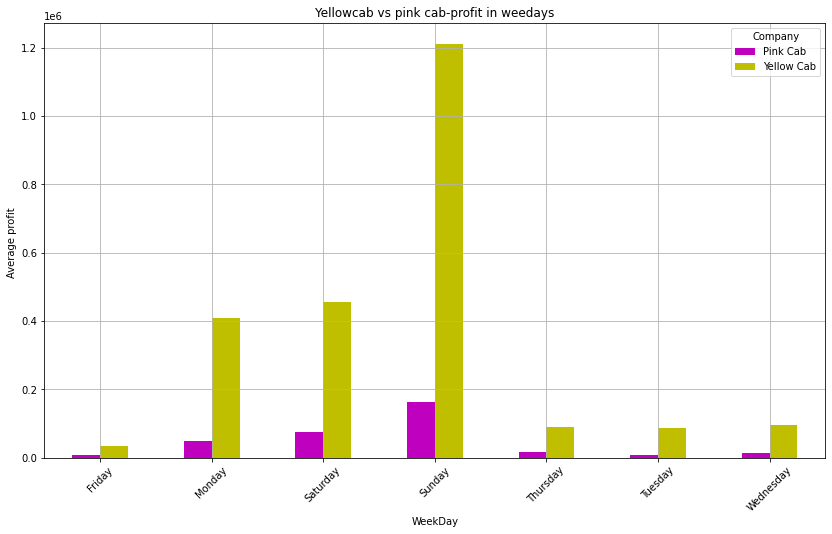

In [91]:
wctr.pivot("WeekDay", "Company", "Profit").plot(kind='bar', figsize=(14,8), color='my')
plt.title(label='Yellowcab vs pink cab-profit in weedays')
plt.ylabel('Average profit ')
plt.grid()
plt.xticks(rotation=45)
plt.show()

### Conclusion 7
* Labor Day Weekend is the most profitable day for Yellow cab business 
* christmas and new year is the second most profitable days for yellow cab
* High income group is the most frequent travellers 
* pink cab earns more profit on christmas 
* weekend is the most preferred days of travelling for the customers of both the cab